In [1]:
# GET DATA
import pandas as pd
import numpy as np

from get_data import get_assets, get_positional_data

get_assets()
positions = get_positional_data()

assets previously downloaded
reading data
reading week 1
added week 1
reading week 2
added week 2
reading week 3
added week 3
reading week 4
added week 4
reading week 5
added week 5
reading week 6
added week 6
reading week 7
added week 7
reading week 8
added week 8
reading week 9
added week 9
reading week 10
added week 10
reading week 11
added week 11
reading week 12
added week 12
reading week 13
added week 13
reading week 14
added week 14
reading week 15
added week 15
reading week 16
added week 16
reading week 17
added week 17
positional data written to assets/full_position.csv
returning positional data.


In [2]:
import form_pred
import importlib
importlib.reload(form_pred)
from form_pred import clean_positional

clean_pos = clean_positional(positions)

In [3]:
clean_pos.head()

,FBL0_x,FBR0_x,HBL0_x,HBL1_x,HBR0_x,HBR1_x,QB0_x,QB1_x,RBL0_x,RBL1_x,...,gamePlayId,perc_left,perc_right,perc_behind_los,FB,HB,QB,RB,TE,WR
0,-5.12,0.00,0.0,0.0,0.0,0.0,-1.73,0.0,0.00,0.0,...,201809060075,0.6,0.4,0.333333,1,0,1,1,1,2
6,0.00,0.00,0.0,0.0,0.0,0.0,-1.60,0.0,-7.37,0.0,...,2018090600146,0.6,0.4,0.166667,0,0,1,1,1,3
12,0.00,0.00,0.0,0.0,0.0,0.0,-5.56,0.0,0.00,0.0,...,2018090600168,0.2,0.8,0.500000,0,0,1,2,1,2
18,0.00,0.00,0.0,0.0,0.0,0.0,-5.17,0.0,-4.24,0.0,...,2018090600190,0.4,0.6,0.500000,0,0,1,1,1,3
24,0.00,-4.59,0.0,0.0,0.0,0.0,-4.88,0.0,-1.33,0.0,...,2018090600256,0.4,0.6,0.333333,1,0,1,1,3,0


In [4]:
import ball_movement
import importlib
importlib.reload(ball_movement)
from ball_movement import ball_quadrants, make_quad_chart

quads = ball_quadrants(positions,4)

make_quad_chart(quads)

alt.Chart(...)

In [5]:
import def_clean
importlib.reload(def_clean)
from def_clean import DefensiveCleaning

def_cleaning = DefensiveCleaning(n_cuts=11)
d = def_cleaning.generate_full_df(1, 14)

..............................initializing
positional data already downloaded.
reading positional data.
returning positional data.
..data downloaded...
...Week 1 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 1 COMPLETE.....

   7.14% COMPLETE   

--- 0.3 minutes elapsed ---

the weeks complete:  [1]
...Week 2 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 2 COMPLETE.....

   14.29% COMPLETE   

--- 0.6 minutes elapsed ---

the weeks complete:  [1 2]
...Week 3 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 3 COMPLETE.....

   21.43% COMPLETE   

--- 1.0 minutes elapsed ---

the weeks complete:  [1 2 3]
...Week 4 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type gene

In [6]:
d = pd.read_csv('assets/def_clean_output.csv')
d['extra_blitzers'] = d['numberOfPassRushers'] - d['DL']
d['on_line_coverage'] = d['defendersInTheBox'] - d['numberOfPassRushers']
d.shape

(13945, 188)

The optimal number of components is approximately  2


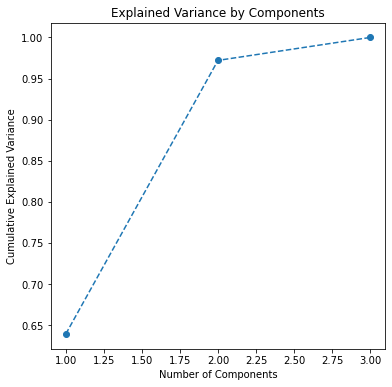

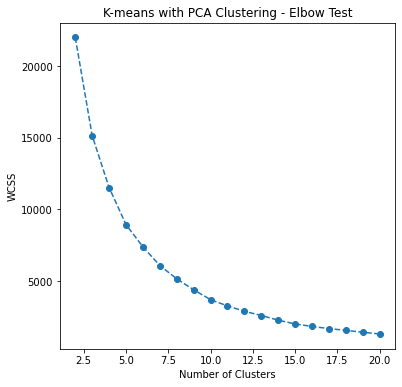

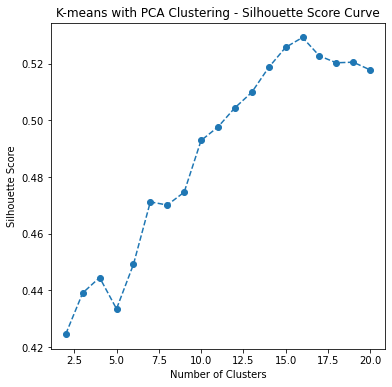

The component names are as follows:  ['Component 1', 'Component 2']


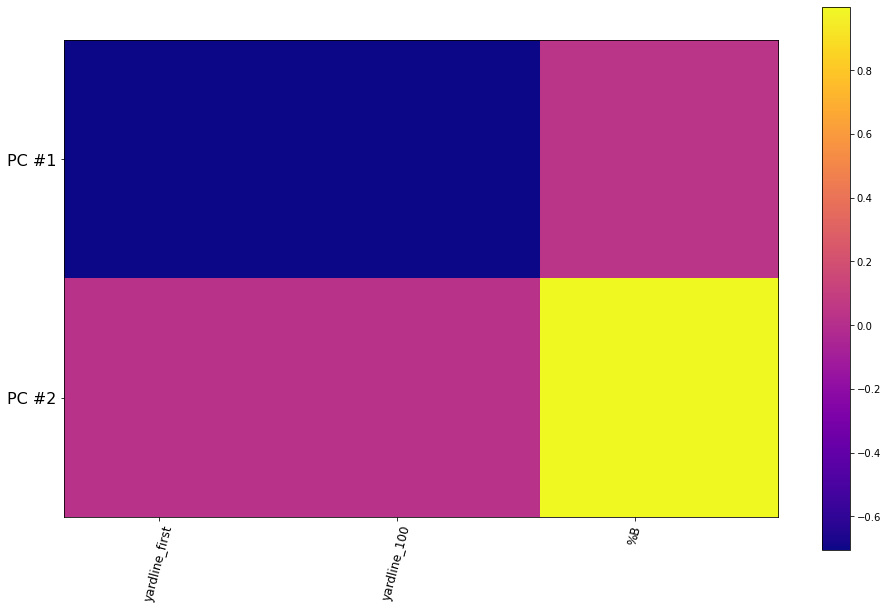

In [7]:
import def_clust
import importlib
importlib.reload(def_clust)
from def_clust import return_pca_and_clusters, kmeans_visual
  
all_features=['defendersInTheBox','extra_blitzers','on_line_coverage','numberOfPassRushers','DB','LB','DL','yardline_first','yardline_100','%B','%M','%Z']
columns2=['%B','%M','%Z']
columns3=['defendersInTheBox','numberOfPassRushers','DB','LB','DL','%M','%Z']
columns4=['DB','LB','DL','%B','%M','%Z']
columns5=['extra_blitzers','on_line_coverage','yardline_first','%B','%M']
columns6=['yardline_first','yardline_100','%B','%M','%Z']
columns7=['defendersInTheBox','numberOfPassRushers','yardline_first','%M','%Z']
columns8=['DB','LB','DL','yardline_first','yardline_100','%B','%M','%Z']
columns9=['defendersInTheBox','numberOfPassRushers','DB','LB','DL','yardline_first','yardline_100']
columns10=['extra_blitzers','on_line_coverage','yardline_first','yardline_100','%M','%Z']
columns11=['yardline_first','%B','%M']
columns12=['yardline_first','yardline_100','%B']
columns13=['DB','LB','DL']
columns14=['extra_blitzers','on_line_coverage','yardline_first','%B','%M']
columns15=['extra_blitzers','on_line_coverage','yardline_first','yardline_100']
columns16=['yardline_100','yardline_first','%B','%M']
columns17=['extra_blitzers','on_line_coverage','yardline_100','yardline_first']
columns18=['defendersInTheBox','numberOfPassRushers','yardline_first']
columns19=['extra_blitzers','on_line_coverage','DB','yardline_first','yardline_100','%Z']
columns20=['extra_blitzers','on_line_coverage','DB','yardline_first','%Z']
columns21=['extra_blitzers','DB','yardline_first','%Z']
columns22=['extra_blitzers','on_line_coverage','DB']

df_seg = return_pca_and_clusters(d, columns=columns12, n_clusters=10)

In [ ]:
# DEFENSIVE COLUMNS TO TEST

columns2=['%B','%M','%Z']

columns4=['DB','LB','DL','%B','%M','%Z']

columns6=['yardline_first','yardline_100','%B','%M','%Z']
columns7=['defendersInTheBox','numberOfPassRushers','yardline_first','%M','%Z']

columns11=['yardline_first','%B','%M']
columns12=['yardline_first','yardline_100','%B']
columns13=['DB','LB','DL']

columns15=['extra_blitzers','on_line_coverage','yardline_first','yardline_100']
columns16=['yardline_100','yardline_first','%B','%M']
columns17=['extra_blitzers','on_line_coverage','yardline_100','yardline_first']
columns18=['defendersInTheBox','numberOfPassRushers','yardline_first']


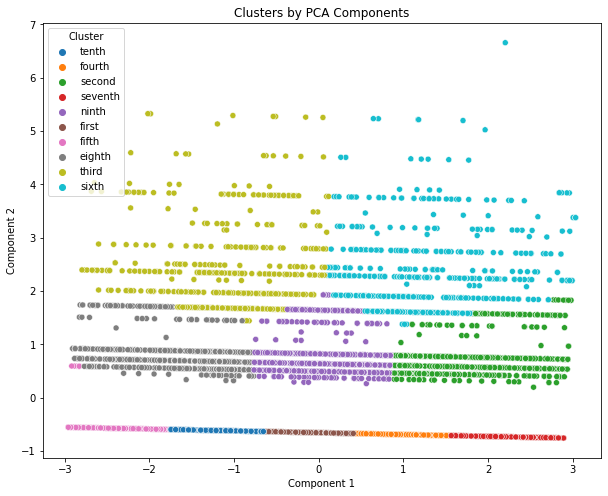

In [8]:
kmeans_visual(df_seg, 'Component 1', 'Component 2')

In [9]:
output_df = def_cleaning.generate_full_df(15, 17, fp='def_clean_output_test.csv')

...Week 15 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 15 COMPLETE.....

   33.33% COMPLETE   

--- 0.3 minutes elapsed ---

the weeks complete:  [15]
...Week 16 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 16 COMPLETE.....

   66.67% COMPLETE   

--- 0.6 minutes elapsed ---

the weeks complete:  [15 16]
...Week 17 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 17 COMPLETE.....

   100.0% COMPLETE   

--- 0.9 minutes elapsed ---

the weeks complete:  [15 16 17]
Defensive cleaning complete --- check assets/def_clean_output_test.csv


In [10]:
d_test = pd.read_csv('assets/def_clean_output_test.csv')
d_test.head()

,gameId,playId,defendersInTheBox,numberOfPassRushers,DB,LB,DL,yardline_first,yardline_100,CBL0_act,...,SSL2_y_start,SSR0_act,SSR0_x_start,SSR0_y_start,SSR1_act,SSR1_x_start,SSR1_y_start,SSR2_act,SSR2_x_start,SSR2_y_start
0,2018121300,84,7.0,7.0,4,3,4,70.0,76.0,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018121300,111,6.0,1.0,6,1,4,61.0,51.0,M,...,NaN,M,15.16,2.19,NaN,NaN,NaN,NaN,NaN,NaN
2,2018121300,164,6.0,4.0,6,1,4,84.0,74.0,M,...,NaN,M,5.29,-6.72,NaN,NaN,NaN,NaN,NaN,NaN
3,2018121300,189,5.0,4.0,6,1,4,84.0,79.0,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018121300,211,5.0,4.0,6,2,3,84.0,79.0,Z,...,NaN,Z,5.18,-8.36,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Calculate cosine similarity for defense

full_df, cut_df = def_cleaning.reduce_time(1)
cosine = def_cleaning.cosine_closest_player(cut_df)

...Week 1 loaded...
...filtered...
...transformed...
...time reduced...
...closest player based on cosine similarity calculated...


In [12]:
# Players with min and max cosine similarities are shown.
# High values mean that the player is moving in a more similar direction
# Low values mean that the player is moving in a more opposite direction.
cosine.head()

,gameId,playId,posId_def,time_cut_time2,posId_off_max,posId_off_min,posId_off_closest
0,2018090600,75,CBL0,2,TEL0,QB0,TEL0
1,2018090600,75,CBL0,3,TEL0,QB0,TEL0
2,2018090600,75,CBL0,4,TEL0,QB0,TEL0
3,2018090600,75,CBL0,5,TEL0,QB0,TEL0
4,2018090600,75,CBL0,6,TEL0,QB0,TEL0


In [13]:
from play_vis import create_starting_chart, create_full_chart

game_id = positions['gameId'].iloc[0]
play_id = positions['playId'].iloc[0]

# Below is an example of how to create the starting chart.
create_starting_chart(positions, game_id, play_id)

Play description: M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).


alt.LayerChart(...)

In [14]:
# Below is an example of how to create the full chart.
create_full_chart(positions, game_id, play_id, n_cuts=20)

Play description: M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).


alt.LayerChart(...)

# Pipeline Demo

In [1]:
from pipeline import FullPipeWrapper

pipe_wrap = FullPipeWrapper()

positional data already downloaded.
reading positional data.
returning positional data.


In [2]:
from sklearn.tree import DecisionTreeClassifier

pipe_full_dtree = pipe_wrap.build_pipe(side="both", model=DecisionTreeClassifier())

In [3]:
from sklearn.model_selection import GridSearchCV

params = {'model__max_depth': range(3, 5),
          'full_pipe__def__def_clust__n_clusters': range(3, 5)}

grid_full_dtree = GridSearchCV(pipe_full_dtree, params)

In [4]:
grid_full_dtree.fit(pipe_wrap.X_train, pipe_wrap.y_train_x)

GridSearchCV(estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')),
                                                                     

In [5]:
grid_full_dtree.best_params_

{'full_pipe__def__def_clust__n_clusters': 4, 'model__max_depth': 3}

In [6]:
grid_full_dtree.best_score_

0.4027459002524571

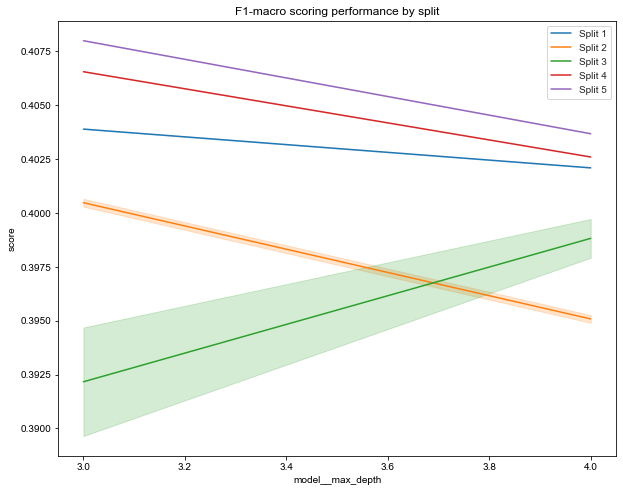

In [7]:
from grid_result_plot import create_result_plot

create_result_plot(grid_full_dtree, "model__max_depth")

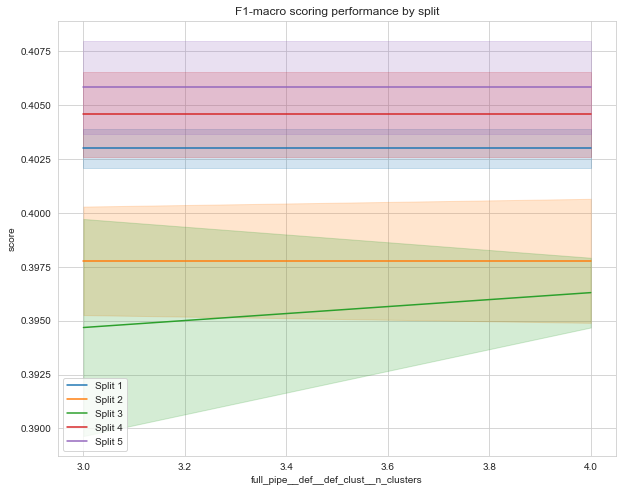

In [8]:
create_result_plot(grid_full_dtree, "full_pipe__def__def_clust__n_clusters")

When you want to use another model, just run the `build_pipe` method again.

In [26]:
pipe_full_dtree = pipe_wrap.build_pipe(side="both", model=RandomForestClassifier(random_state=0))